In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels import api as sm
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from collections import Counter
import ast
import os
import warnings
warnings.filterwarnings("ignore")

#import các thư viện cần thiết


In [2]:
folder_path = r"E:\myproject\steam"

# Danh sách tên các file
filenames = [
    "achievements.csv",
    "friends.csv",
    "games.csv",
    "history.csv",
    "players.csv",
    "prices.csv",
    "private_steamids.csv",
    "purchased_games.csv",
    "reviews.csv"
]

for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    var_name = os.path.splitext(filename)[0]
    globals()[var_name] = pd.read_csv(file_path)

#Load các file dataset



In [3]:
players.head(5)

,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
2,76561198049686270,NaN,2011-09-28 21:43:59
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
4,76561198119605821,NaN,2013-12-26 00:25:50


In [4]:
purchased_games.head(5)

,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."


In [5]:
friends.head(5)

,playerid,friends
0,76561198060422271,"['76561198018120276', '76561198034545417', '76..."
1,76561198113439786,"['76561198047435192', '76561198059136488', '76..."
2,76561198149851326,"['76561197991555589', '76561198003513187', '76..."
3,76561198296997371,NaN
4,76561198895573082,"['76561197960300358', '76561197961330830', '76..."


In [6]:
reviews.head(5)

,reviewid,playerid,gameid,review,helpful,funny,awards,posted
0,639543,76561198796340888,730,Goud gamę i have 3 vac ban acont but i stilll ...,0,0,0,2018-03-22
1,639544,76561198028706627,393380,---{ Graphics }---☐ You forget what reality is...,0,0,0,2025-01-03
2,639545,76561198028706627,10,One of the best FPS games :),0,0,0,2012-05-13
3,639546,76561198049356580,469600,gayet güzel w3 havasını yakalıyor,0,0,0,2018-04-21
4,639547,76561198272817436,730,ONE OF THE GAMES I COME BACK TO,2,0,0,2020-01-23


In [7]:
reviews_count = reviews.groupby('playerid').size().reset_index(name='review_count')
reviews_count

,playerid,review_count
0,76561197960265861,1
1,76561197960266039,7
2,76561197960266642,5
3,76561197960266945,5
4,76561197960268165,1
...,...,...
196693,76561199788783876,2
196694,76561199789013768,5
196695,76561199791418179,1
196696,76561199791635565,1


In [8]:
history.head(5)

,playerid,achievementid,date_acquired
0,76561198220441373,403640_ACH_1,2019-12-18 15:33:43
1,76561198220441373,403640_ACH_2,2019-12-18 23:49:51
2,76561198220441373,403640_ACH_3,2019-12-19 23:05:07
3,76561198220441373,403640_ACH_4,2019-12-24 05:50:49
4,76561198220441373,403640_ACH_5,2023-04-19 22:39:36


In [9]:
total_achievements = history.groupby('playerid').agg({'achievementid': 'count'}).reset_index()
total_achievements.columns = ['playerid', 'total_achievements']
total_achievements.head(5)

,playerid,total_achievements
0,76561197960272169,5623
1,76561197960324512,1547
2,76561197960335869,30909
3,76561197960355806,149
4,76561197960376165,1782


In [10]:
players_merged = players.merge(purchased_games, on='playerid', how='left')\
.merge(friends, on='playerid', how='left')\
.merge(reviews_count, on='playerid', how='left')\
.merge(total_achievements, on='playerid', how='left')
players_merged.head(5)
# join các bảng dữ liệu cần phân tích

,playerid,country,created,library,friends,review_count,total_achievements
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,9.0,NaN
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",31.0,NaN
2,76561198049686270,NaN,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",3.0,NaN
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",3.0,NaN
4,76561198119605821,NaN,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76...",NaN,NaN


In [11]:
player_public =players_merged[~players_merged['playerid'].isin(private_steamids['playerid'])]
player_public["year_created"] = players["created"].str[:4]
def playcs2(row):
    try:
        # Tạo hàm để kiểm tra xem người chơi có chơi CS2 hay không dựa vào cột 'library'
        games = row if isinstance(row, list) else ast.literal_eval(row)
        if len(games) > 0:
             return 1 if any(game in set([730]) for game in games) else 0
        else:
            return 0
    except:
        return 0 
    
player_public["play_cs2"] = player_public["library"].apply(playcs2)

In [12]:
total_games = player_public["library"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
player_public["total_games"] = total_games
total_friends = player_public["friends"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
player_public["total_friends"] = total_friends
player_public.head(10)
# Đây sẽ là bảng dữ liệu để thực hiện phân tích người chơi sau khi đã join những bảng trên

,playerid,country,created,library,friends,review_count,total_achievements,year_created,play_cs2,total_games,total_friends
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,9.0,NaN,2016,1,476,0
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",31.0,NaN,2011,1,836,316
2,76561198049686270,NaN,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",3.0,NaN,2011,0,0,718
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",3.0,NaN,2014,0,0,94
5,76561198083492916,Russian Federation,2013-02-09 04:05:02,"[1300, 1309, 1313, 2500, 1510, 2100, 2130, 383...","['76561197960300493', '76561197960399877', '76...",87.0,NaN,2013,1,1509,486
6,76561198150634683,Madagascar,2014-08-19 01:49:11,"[10, 30, 40, 60, 80, 100, 70, 220, 202200, 673...","['76561197960618312', '76561197961226780', '76...",25.0,NaN,2014,1,1290,201
7,76561198836367256,Australia,2018-05-19 06:17:07,"[2600, 15100, 500, 282140, 367500, 480490, 403...","['76561197960364629', '76561197960506705', '76...",27.0,NaN,2018,0,445,1107
9,76561198122070915,NaN,2014-01-08 02:38:32,"[50, 70, 130, 1200, 16730, 9480, 17470, 19000,...","['76561197972014387', '76561197974486376', '76...",9.0,NaN,2014,1,1805,175
10,76561198740883087,Australia,2017-06-25 14:45:50,NaN,NaN,7.0,NaN,2017,0,0,0
11,76561198016756834,Russian Federation,2009-11-22 16:09:36,"[10, 80, 100, 20, 50, 70, 130, 300, 12200, 948...","['76561197977275866', '76561197979859921', '76...",8.0,NaN,2009,1,1303,106


In [13]:
player_public.info()
#Thực hiện EDA

<class 'pandas.core.frame.DataFrame'>
Index: 196720 entries, 0 to 424681
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   playerid            196720 non-null  int64  
 1   country             131186 non-null  object 
 2   created             176531 non-null  object 
 3   library             30131 non-null   object 
 4   friends             152658 non-null  object 
 5   review_count        196698 non-null  float64
 6   total_achievements  3203 non-null    float64
 7   year_created        176531 non-null  object 
 8   play_cs2            196720 non-null  int64  
 9   total_games         196720 non-null  int64  
 10  total_friends       196720 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 18.0+ MB


In [14]:
player_public.shape

(196720, 11)

In [15]:
player_public.describe()

,playerid,review_count,total_achievements,play_cs2,total_games,total_friends
count,1.967200e+05,196698.000000,3203.000000,196720.000000,196720.000000,196720.000000
mean,7.656120e+16,6.123774,2890.126756,0.144540,49.071503,94.022519
std,3.747283e+08,50.405434,14947.809648,0.351638,422.941778,127.051789
min,7.656120e+16,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.656120e+16,1.000000,259.000000,0.000000,0.000000,12.000000
50%,7.656120e+16,2.000000,775.000000,0.000000,0.000000,62.000000
75%,7.656120e+16,5.000000,2040.500000,0.000000,0.000000,131.000000
max,7.656120e+16,14893.000000,545949.000000,1.000000,32463.000000,2000.000000


In [16]:
player_public.isnull().sum()
#số lượng null trong total_achievements quá lớn, và số null này ko xác định được là do người chơi ko đạt được (ít khả năng) hay do dữ liệu bị thiếu, vì vậy sẽ ko phân tích tiêu chí này nữa

playerid                   0
country                65534
created                20189
library               166589
friends                44062
review_count              22
total_achievements    193517
year_created           20189
play_cs2                   0
total_games                0
total_friends              0
dtype: int64

Text(0.5, 1.0, 'Top 10 quốc gia có nhiều người chơi nhất')

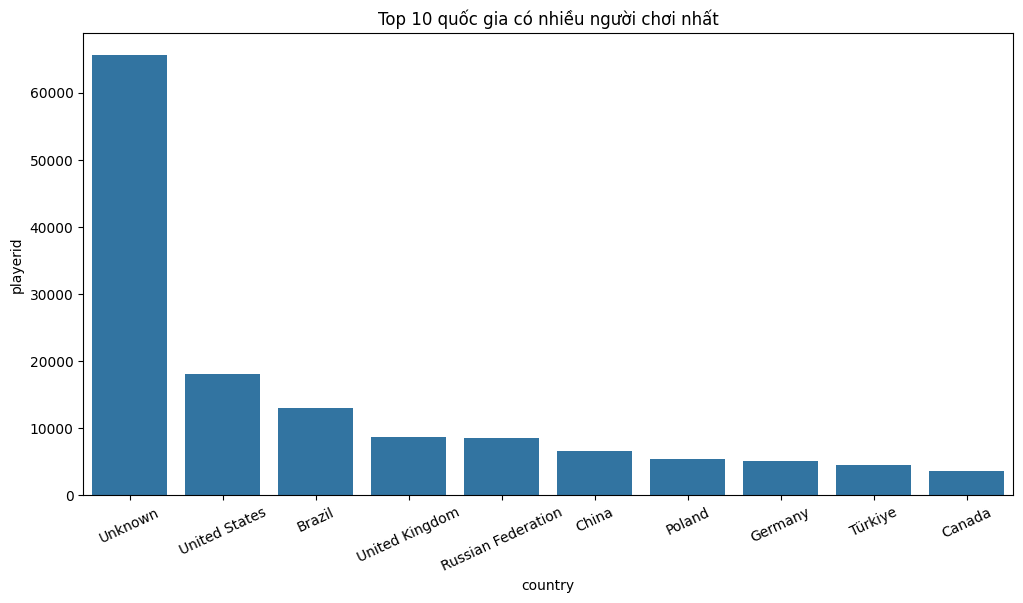

In [17]:
player_public["country"]= player_public["country"].fillna("Unknown")
country_counts=  player_public.groupby("country").agg({'playerid':'count'}).reset_index()
country_counts= country_counts.sort_values(by="playerid", ascending= False)
plt.figure(figsize =(12,6))
sns.barplot(x= country_counts["country"][:10], y= country_counts["playerid"][:10])
plt.xticks(rotation= 25)
plt.title("Top 10 quốc gia có nhiều người chơi nhất")

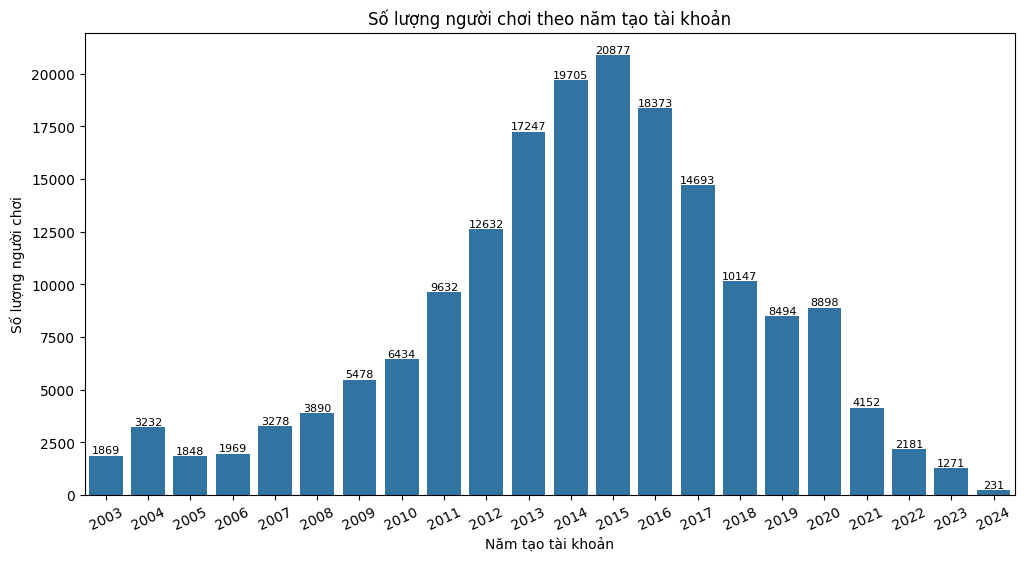

In [18]:

gby = player_public.groupby("year_created").agg({"playerid":'count'}).reset_index()

plt.figure(figsize =(12,6))
ax =sns.barplot(x= gby["year_created"], y= gby["playerid"])
plt.xticks(rotation= 25)
plt.title("Số lượng người chơi theo năm tạo tài khoản")
plt.xlabel("Năm tạo tài khoản")
plt.ylabel("Số lượng người chơi")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   
        height,                            
        f'{int(height)}',                     
        ha='center',                     
        va='bottom' ,    
        fontsize = 8                 
    )


In [ ]:
total_per_country = player_public.groupby('country')['playerid'].count()
cs2_per_country = player_public[player_public['play_cs2'] == 1].groupby('country')['playerid'].count()
cs2_percentage = (cs2_per_country / total_per_country) * 100
cs2_percentage = cs2_percentage.round(2).sort_values(ascending=False)
cs2_percentage.head(300)
# Tỷ lệ người chơi CS2 theo quốc gia

country
Saint Barthélemy                66.67
Lesotho                         50.00
Senegal                         36.36
Mali                            33.33
Mauritania                      33.33
                                ...  
South Sudan                       NaN
Svalbard and Jan Mayen            NaN
Tanzania, United Republic of      NaN
Timor-Leste                       NaN
Vanuatu                           NaN
Name: playerid, Length: 250, dtype: float64

In [ ]:
total_per_country = player_public.groupby('year_created')['playerid'].count()
cs2_per_country = player_public[player_public['play_cs2'] == 1].groupby('year_created')['playerid'].count()
cs2_percentage = (cs2_per_country / total_per_country) * 100
cs2_percentage = cs2_percentage.round(2).sort_values(ascending=False)
cs2_percentage.head(5)
# Tỷ lệ người chơi CS2 theo năm tạo tài khoản

year_created
2019.0    19.71
2018.0    19.44
2020.0    19.26
2017.0    18.24
2021.0    18.04
Name: playerid, dtype: float64

In [19]:
def count_value(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    else:
        return [] 
    

playerss= player_public[player_public['library'].notna()].copy()
playerss["library"] = playerss["library"].apply(count_value)

Text(0.5, 1.0, 'Top 10 quốc gia chơi CS2')

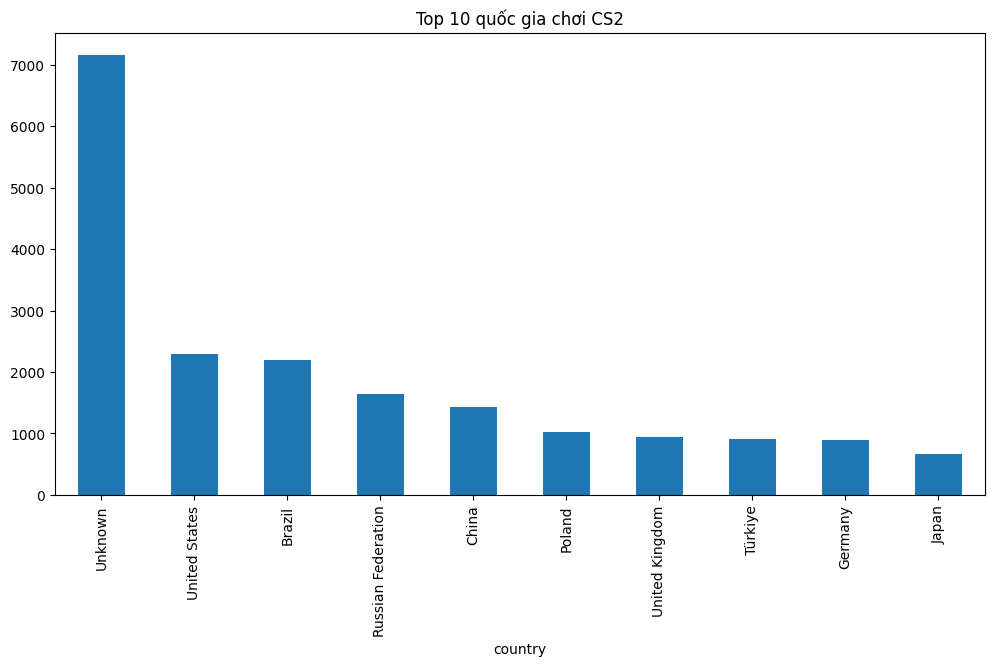

In [20]:
playerss[playerss["play_cs2"] == 1]["country"].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 quốc gia chơi CS2')
#chỉ xét tới những tài khoản có data của library hiển thị

In [59]:
playerss.shape

(30131, 11)

In [21]:
all_games = [
    game
    for games in playerss['library']
    if isinstance(games, list)  
    for game in games
]

# Thực hiện đếm số lần xuất hiện của mỗi game ID để xác định game phổ biến nhất
game_counts = Counter(all_games)


if game_counts:
    most_common_game, count = game_counts.most_common(1)[0]
    print(f"Game ID phổ biến nhất: {most_common_game}, Số lần xuất hiện: {count}")
else:
    print("Không có dữ liệu hợp lệ")

Game ID phổ biến nhất: 730, Số lần xuất hiện: 28434


In [22]:
game_count = pd.DataFrame(game_counts.items(), columns=['gameid', 'count'])
game_count = game_count.sort_values(by="count", ascending= False)
game_count
# Tìm những tựa game có trong thư viện của người chơi nhiều nhất

,gameid,count
149,730,28434
308,578080,19690
24,550,18766
297,218620,18451
651,304930,16271
...,...,...
36539,1707720,1
39975,107000,1
39974,6350,1
36549,1730190,1


In [ ]:
game_count = game_count.merge(games, on='gameid', how='left')
game_count 
# Đây sẽ là bảng để phân tích thông tin các tựa game

,gameid,count,title,developers,publishers,genres,supported_languages,release_date
0,730,28434,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21
1,578080,19690,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21
2,550,18766,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16
3,218620,18451,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13
4,304930,16271,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07
...,...,...,...,...,...,...,...,...
40916,1707720,1,Blood for Poppies,['Hosted Games'],['Hosted Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'RPG']",['English'],2021-08-19
40917,107000,1,NaN,NaN,NaN,NaN,NaN,NaN
40918,6350,1,NaN,NaN,NaN,NaN,NaN,NaN
40919,1730190,1,The Patient S Remedy,['MADA labo'],['MADA labo'],"['Adventure', 'Indie', 'RPG', 'Simulation']","['Japanese', 'English']",2021-09-29


In [24]:
game_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40921 entries, 0 to 40920
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gameid               40921 non-null  int64 
 1   count                40921 non-null  int64 
 2   title                37138 non-null  object
 3   developers           37042 non-null  object
 4   publishers           36752 non-null  object
 5   genres               37060 non-null  object
 6   supported_languages  37134 non-null  object
 7   release_date         37139 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.5+ MB


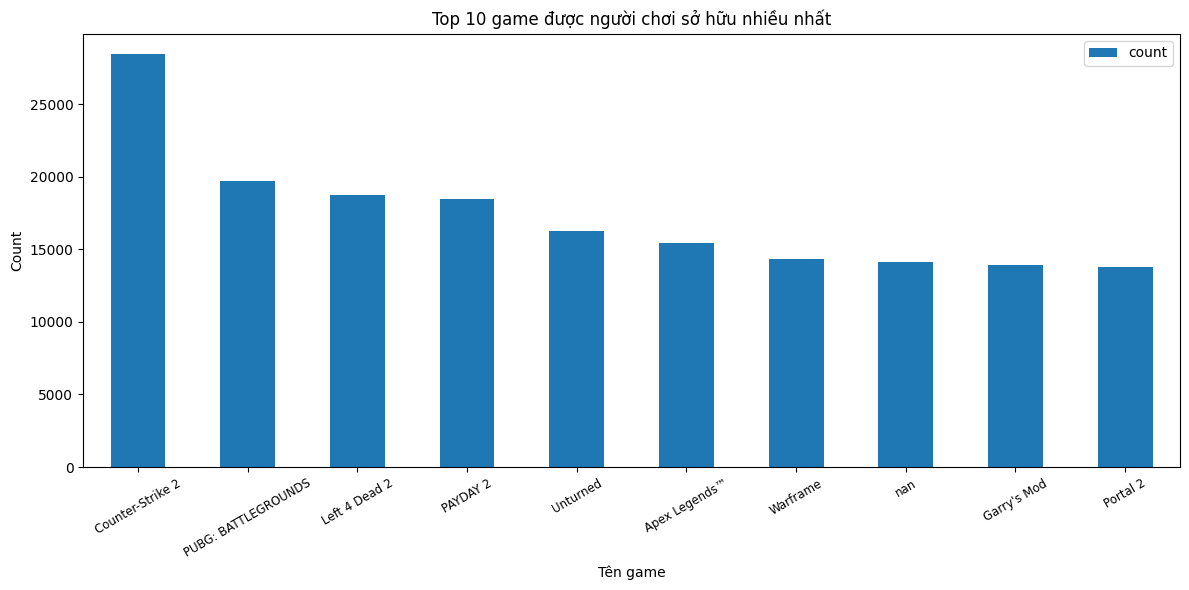

In [25]:
game_count.head(10).plot(kind='bar', x='title', y='count', figsize=(12, 6))
plt.title('Top 10 game được người chơi sở hữu nhiều nhất')
plt.xlabel('Tên game')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=8.5)
plt.tight_layout()
plt.show()
# 3 tựa game phổ biến nhất là CS2, PUBG và Left for Dead 2, các tựa game không có tên tập hợp lại xếp thứ 8, dữ liệu này chỉ xét đến những người chơi có library được hiển thị

In [26]:
game_count.loc[game_count['developers'] == "['Valve']"]["title"].unique()
# Tìm những tựa game do Valve phát triển trong thư viện của người chơi

array(['Counter-Strike 2', 'Left 4 Dead 2', 'Portal 2',
       'Half-Life 2: Deathmatch', 'Half-Life Deathmatch: Source',
       'Half-Life 2', 'Counter-Strike', 'Portal',
       'Counter-Strike: Source', 'Counter-Strike: Condition Zero',
       'Half-Life', 'Left 4 Dead', 'Team Fortress Classic',
       'Day of Defeat: Source', 'Half-Life: Source', 'Day of Defeat',
       'Deathmatch Classic', 'Ricochet', 'Dota Underlords', 'The Lab',
       'Aperture Desk Job', 'Half-Life: Alyx', 'Artifact', 'Alien Swarm'],
      dtype=object)

In [27]:
games.head(10)

,gameid,title,developers,publishers,genres,supported_languages,release_date
0,3281560,Horror Game To Play With Friends! Playtest,NaN,NaN,NaN,NaN,2024-10-21
1,3280930,Eternals' Path Playtest,NaN,NaN,NaN,NaN,2024-10-17
2,3280770,ANGST: A TALE OF SURVIVAL - Singleplayer Playtest,NaN,NaN,NaN,NaN,2024-10-13
3,3279790,Montabi Playtest,NaN,NaN,NaN,NaN,2024-10-13
4,3278320,파이팅걸 유리 Playtest,NaN,NaN,NaN,NaN,2024-10-12
5,3278740,NEURO,['Revolt Games'],['Strategy First'],['Action'],"['English', 'Russian']",2024-10-11
6,3277430,Objective: F.E.A.S.T. Playtest,NaN,NaN,NaN,NaN,2024-10-12
7,3276500,Fortune Avenue Playtest,NaN,NaN,NaN,NaN,2024-10-09
8,3274370,Beyond the Ordinary Playtest,NaN,NaN,NaN,NaN,2024-10-11
9,3274670,Quantum Joe Playtest,NaN,NaN,NaN,NaN,2024-10-11


In [28]:
def bo_ngoac_vuong(x):
    try:
        val = ast.literal_eval(x)
        if isinstance(val, list):
            return ', '.join(str(item) for item in val)
        return str(val)
    except:
        return x 

# Các giá trị trong dataset bị đặt trong ngoặc vuông, ở đây cần loại bỏ ngoặc vuông để dễ dàng phân tích
games_cleaned = games.applymap(bo_ngoac_vuong)
games_cleaned.head(10)

,gameid,title,developers,publishers,genres,supported_languages,release_date
0,3281560,Horror Game To Play With Friends! Playtest,NaN,NaN,NaN,NaN,2024-10-21
1,3280930,Eternals' Path Playtest,NaN,NaN,NaN,NaN,2024-10-17
2,3280770,ANGST: A TALE OF SURVIVAL - Singleplayer Playtest,NaN,NaN,NaN,NaN,2024-10-13
3,3279790,Montabi Playtest,NaN,NaN,NaN,NaN,2024-10-13
4,3278320,파이팅걸 유리 Playtest,NaN,NaN,NaN,NaN,2024-10-12
5,3278740,NEURO,Revolt Games,Strategy First,Action,"English, Russian",2024-10-11
6,3277430,Objective: F.E.A.S.T. Playtest,NaN,NaN,NaN,NaN,2024-10-12
7,3276500,Fortune Avenue Playtest,NaN,NaN,NaN,NaN,2024-10-09
8,3274370,Beyond the Ordinary Playtest,NaN,NaN,NaN,NaN,2024-10-11
9,3274670,Quantum Joe Playtest,NaN,NaN,NaN,NaN,2024-10-11


Text(0.5, 1.0, 'Top 10 thể loại game phổ biến nhất')

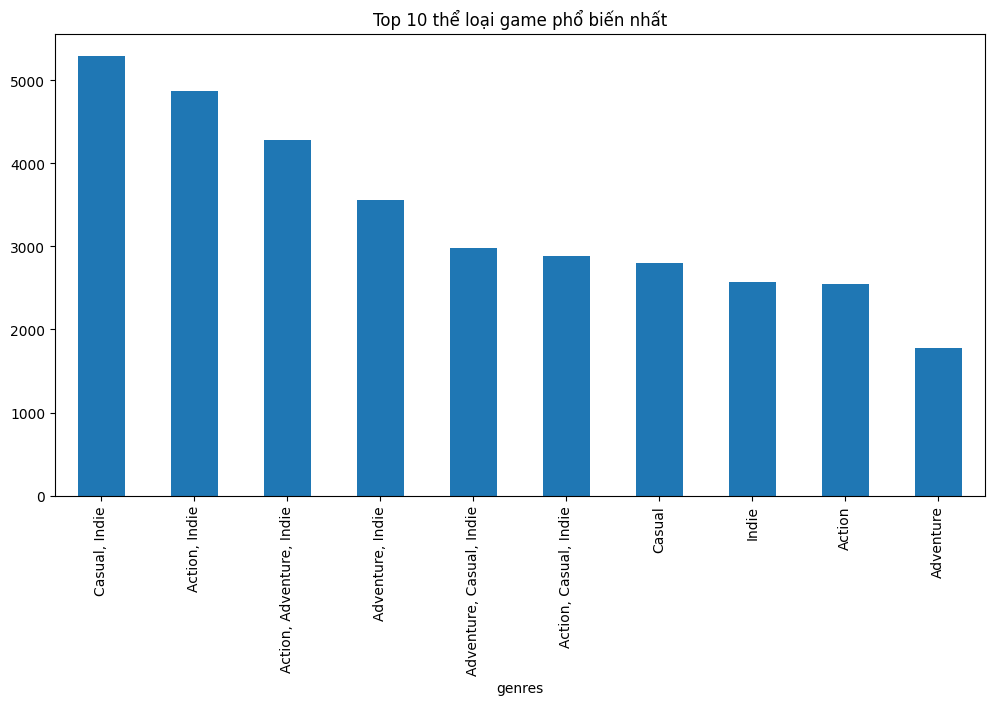

In [29]:
games_cleaned["genres"].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 thể loại game phổ biến nhất')

In [30]:
player_public.shape

(196720, 11)

In [31]:
player_public["year_created"] = player_public["year_created"].astype(float)
players_nonull = player_public[player_public["created"].notna() & player_public["review_count"].notna()]

X= players_nonull[["year_created", "total_friends", "total_games","review_count"]]
y= players_nonull["play_cs2"]


In [32]:
players_nonull.shape
# Do các giá trị null không thể sử dụng trong mô hình, ta sẽ loại bỏ các hàng có giá trị null trong các cột cần thiết

(176513, 11)

<Axes: ylabel='count'>

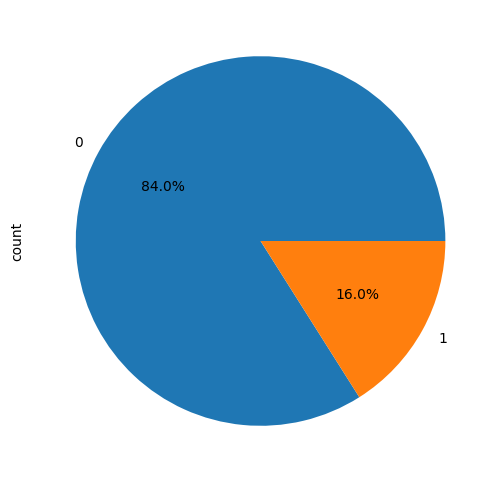

In [ ]:
players_nonull["play_cs2"].value_counts().plot(kind= 'pie', figsize=(8, 6), autopct='%1.1f%%')
# Tỉ lệ người chơi CS2 so với không chơi CS2 có sự chênh lệch khá lớn, vì vậy training dataset sẽ bị imbalance, tuy nhiên 16% vẫn là con số vừa đủ để chưa cần phải sử dụng tới resampling techniques
# Dữ liệu này chỉ là một phần nhỏ của dữ liệu thực tế, đồng thời mặc định những tài khoản có thư viện trống ( dù tại vì tài khoản riêng tư hay do dữ liệu bị thiếu) sẽ không chơi CS2, vì vậy tỉ lệ này có thể không phản ánh đúng thực tế

Text(0.5, 1.0, 'Heatmap of correlations')

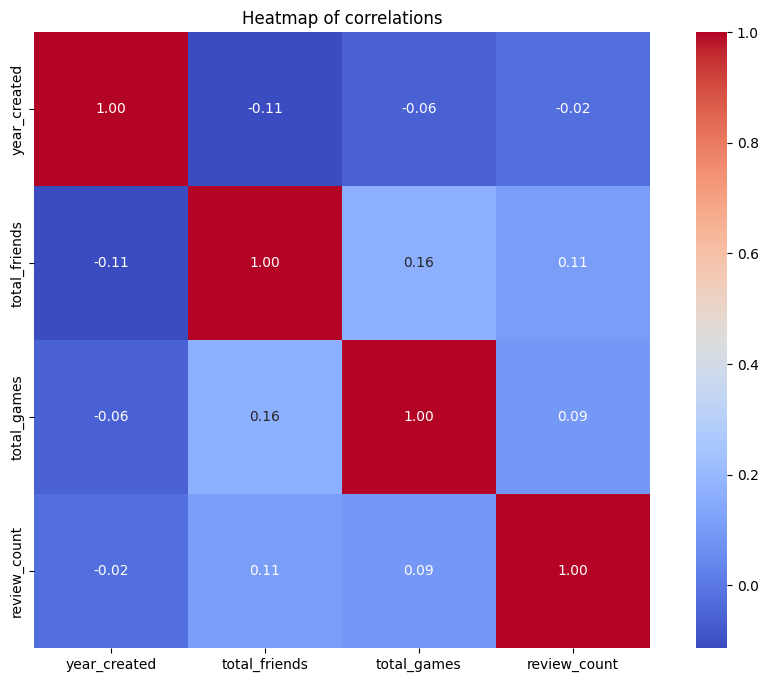

In [34]:
heatmap = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap of correlations")
# Không có multicollinearity giữa các biến độc lập, có thể sử dụng hồi quy logistic để dự đoán biến nhị phân play_cs2, dựa vào dataset có thể giả định các quan sát độc lập với nhau

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[-0.00121249,  0.00049304,  0.03055785, -0.0671708 ]]),
 array([-2.18810864e-05]))

In [36]:
y_pred = model.predict(X_test)

In [37]:
logistic_accuracy = metrics.accuracy_score(y_test, y_pred)
logistic_f1 = metrics.f1_score(y_test, y_pred)
logistic_precision = metrics.precision_score(y_test, y_pred)
logistic_recall = metrics.recall_score(y_test, y_pred)

In [38]:
Counter(y_pred)

Counter({0: 31792, 1: 3511})

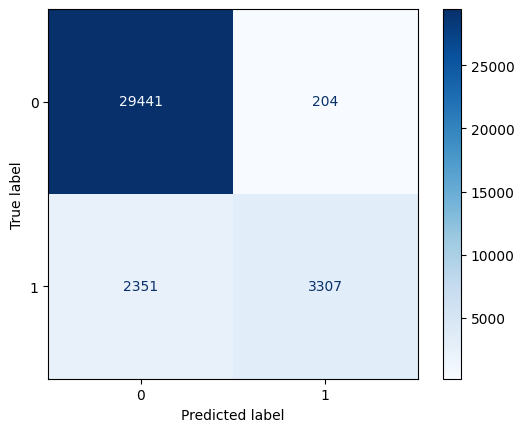

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred,labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
# Đây là confusion matrix của mô hình hồi quy logistic

In [40]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preddd = decision_tree.predict(X_test)

In [41]:

y_preddd = decision_tree.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, y_preddd)
decision_tree_f1 = metrics.f1_score(y_test, y_preddd)
decision_tree_precision = metrics.precision_score(y_test, y_preddd)
decision_tree_recall = metrics.recall_score(y_test, y_preddd)

[Text(0.4375, 0.9, 'total_games <= 0.5\ngini = 0.269\nsamples = 141210\nvalue = [118577, 22633]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 117220\nvalue = [117220, 0]'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.5, 0.7, 'year_created <= 2011.5\ngini = 0.107\nsamples = 23990\nvalue = [1357, 22633]'),
 Text(0.46875, 0.8, '  False'),
 Text(0.25, 0.5, 'total_friends <= 84.5\ngini = 0.182\nsamples = 4092\nvalue = [414, 3678]'),
 Text(0.125, 0.3, 'total_friends <= 0.5\ngini = 0.239\nsamples = 1812\nvalue = [252.0, 1560.0]'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'review_count <= 24.5\ngini = 0.132\nsamples = 2280\nvalue = [162, 2118]'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'total_friends <= 67.5\ngini = 0.09\nsamples = 19898\nvalue = [943, 18955]'),
 Text(0.625, 0.3, 'review_count <= 4.5\ngini = 0.129\nsamples = 8177\nvalue = [567, 7610]'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.68

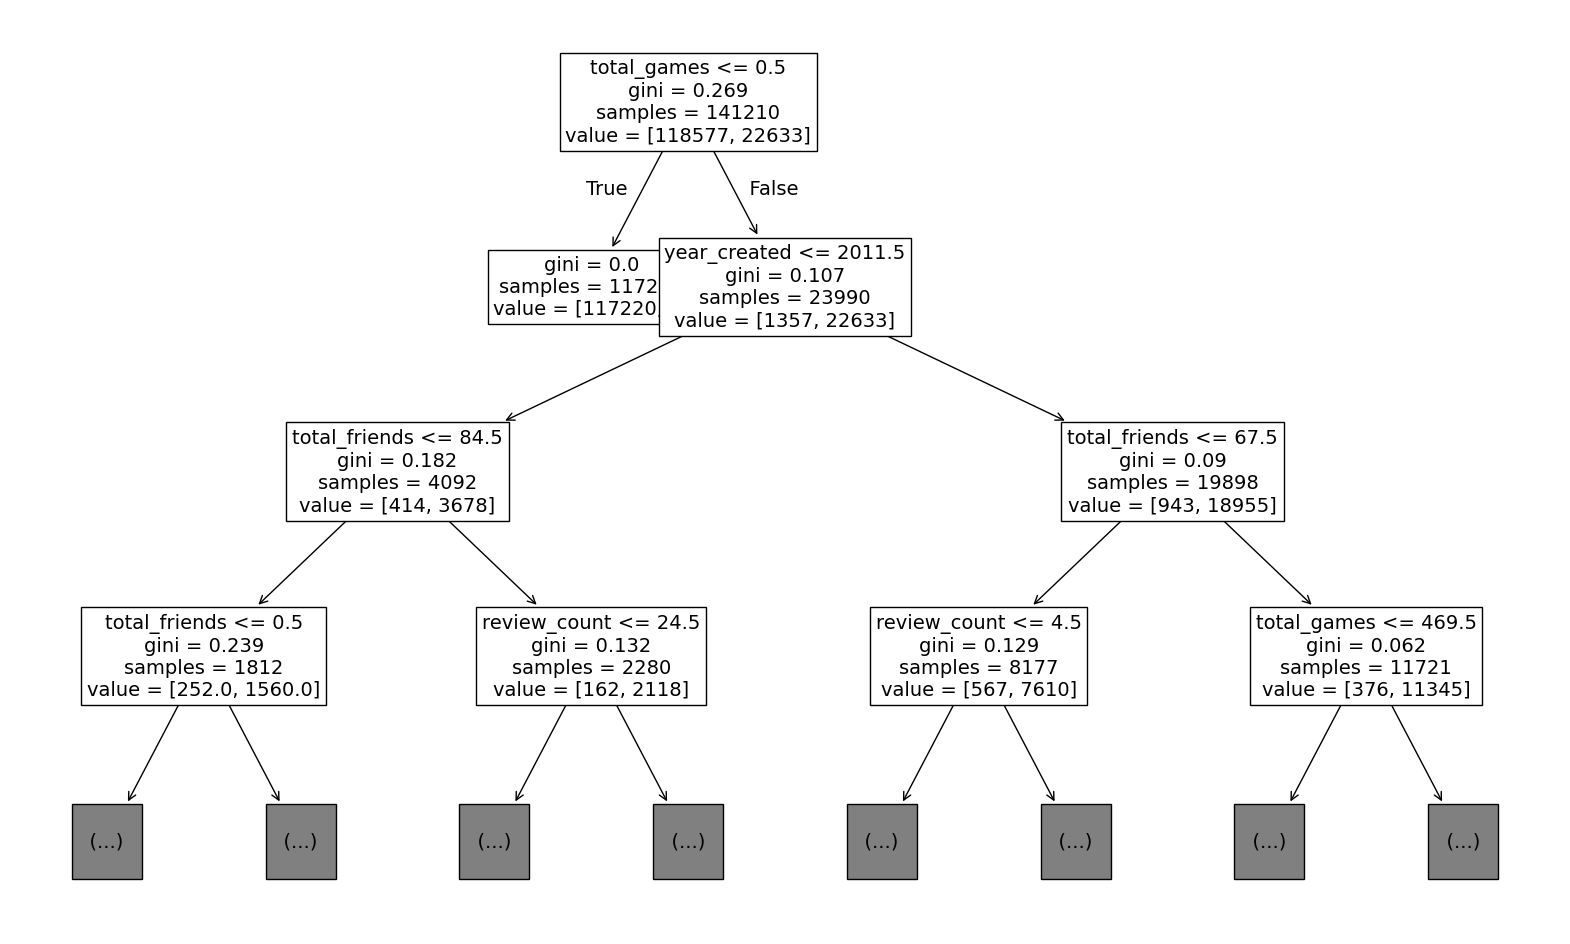

In [42]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns)

In [43]:
importances1 = decision_tree.feature_importances_
forest_importances1 = pd.DataFrame(importances1, index=X.columns, columns=["importance"])
forest_importances1 = forest_importances1.sort_values(by="importance", ascending=False)
forest_importances1
# Biểu đồ tầm quan trọng của các biến trong mô hình Decision Tree

,importance
total_games,0.959669
total_friends,0.019338
year_created,0.010552
review_count,0.010441


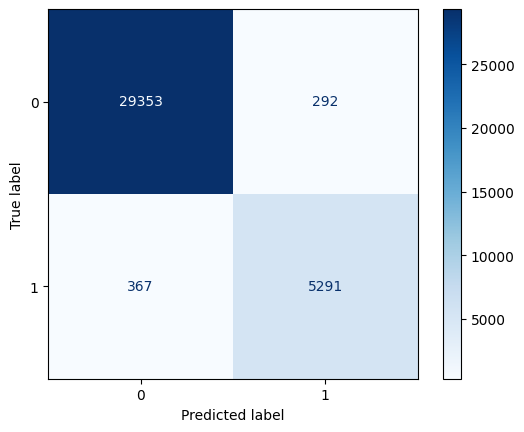

In [44]:
cm1 = metrics.confusion_matrix(y_test, y_preddd,labels=decision_tree.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=decision_tree.classes_)
disp1.plot(cmap=plt.cm.Blues)

In [45]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
cv_params = {
    'max_depth': [3, 4, 5, 6, 7,8,9,10,12,15],
    'min_sample_leaf': [1, 2, 3, 4],
   'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [5,10,15]}


scoring = {'f1': 'f1', 'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
xgb_cv = GridSearchCV(xgb, cv_params,scoring=scoring,cv=5,refit='f1')
xgb_cv = xgb_cv.fit(X_train,y_train)


In [46]:
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
                         'min_sample_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [47]:
y_predd = xgb_cv.predict(X_test)
xgb_accuracy = metrics.accuracy_score(y_test, y_predd)
xgb_f1 = metrics.f1_score(y_test, y_predd)
xgb_precision = metrics.precision_score(y_test, y_predd)
xgb_recall = metrics.recall_score(y_test, y_predd)
print("XGBoost Accuracy:", xgb_accuracy," F1:", xgb_f1, "Precision:", xgb_precision, "Recall:", xgb_recall)

XGBoost Accuracy: 0.9905390476730023  F1: 0.9713009108094174 Precision: 0.9451505016722408 Recall: 0.9989395546129375


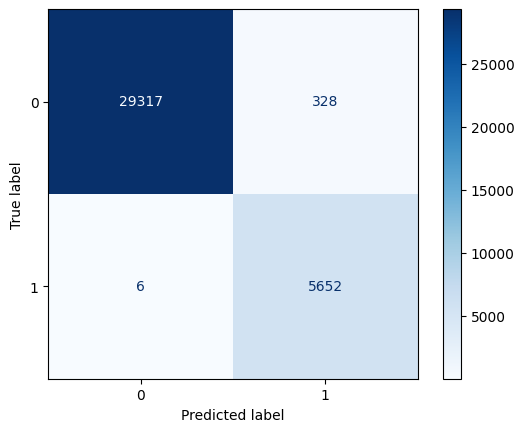

In [48]:
cm2 = metrics.confusion_matrix(y_test, y_predd,labels=xgb_cv.classes_)
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=xgb_cv.classes_)
disp2.plot(cmap=plt.cm.Blues)

In [49]:
random_forest = RandomForestClassifier(random_state=42)
cv_paramss = {
    'max_depth': [3,6,10,15],
    'n_estimators': [1,2,3]}
rf_cv = GridSearchCV(random_forest, cv_paramss, scoring=scoring, cv=5, refit='f1')
rf_cv = rf_cv.fit(X_train, y_train)
rf_cv


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, 10, 15],
                         'n_estimators': [1, 2, 3]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [50]:
rf_accuracy = rf_cv.score(X_test, y_test)
rf_precision = metrics.precision_score(y_test, rf_cv.predict(X_test))
rf_recall = metrics.recall_score(y_test, rf_cv.predict(X_test))
rf_f1 = metrics.f1_score(y_test, rf_cv.predict(X_test))
print(f"Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}")


Accuracy: 0.97, Precision: 0.95, Recall: 1.00, F1 Score: 0.97


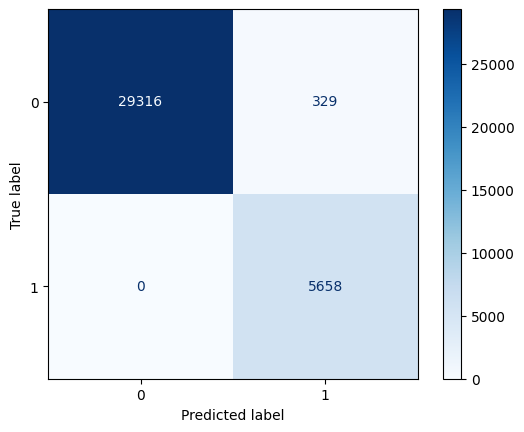

In [51]:
cm3 = metrics.confusion_matrix(y_test, rf_cv.predict(X_test),labels=rf_cv.classes_)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf_cv.classes_)
disp3.plot(cmap=plt.cm.Blues)

In [52]:
model_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest'],
    'Accuracy': [logistic_accuracy, decision_tree_accuracy, xgb_accuracy, rf_accuracy],
    'F1 Score': [logistic_f1, decision_tree_f1, xgb_f1, rf_f1],
    'Precision': [logistic_precision, decision_tree_precision, xgb_precision, rf_precision],
    'Recall': [logistic_recall, decision_tree_recall, xgb_recall, rf_recall]})
model_compare

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.927627,0.721344,0.941897,0.584482
1,Decision Tree,0.981333,0.941375,0.947698,0.935136
2,XGBoost,0.990539,0.971301,0.945151,0.998940
3,Random Forest,0.971748,0.971748,0.945048,1.000000


In [56]:
#A/B test
# Những người chơi CS2 có số lượng game trong thư viện lớn hơn những người không chơi CS2 hay không?
#H₀: Số lượng game trong thư viện của người chơi CS2 và không chơi CS2 là bằng nhau.
#H₁: Số lượng game trong thư viện của người chơi CS2 lớn hơn những người không chơi CS2
# Bắt đầu thực hiện one-tailed t-test để kiểm tra giả thuyết này
from scipy.stats import ttest_ind
t1= player_public[player_public["play_cs2"] == 1]["total_games"]
t2= player_public[player_public["play_cs2"] == 0]["total_games"]
t_stat, p_value_two_tailed = ttest_ind(t1, t2, equal_var=False)
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - p_value_two_tailed / 2

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Bác bỏ H₀: Người chơi CS2 có số lượng game trong thư viện lớn hơn người không chơi CS2.")
    print (t_stat , p_value_one_tailed)
else:
    print("Không đủ bằng chứng để bác bỏ H₀.")

Bác bỏ H₀: Người chơi CS2 có số lượng game trong thư viện lớn hơn người không chơi CS2.
50.03999378358133 0.0
